In [1]:
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

import pycaret

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sub = pd.read_csv('gender_submission.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train["Survived"]=train["Survived"].apply(lambda x:"Survived" if x==1 else "Dead")

In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,Dead,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,Survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,Survived,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,Survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,Dead,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,Dead,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,Survived,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,Dead,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,Survived,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
train["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [9]:
def cat_summary(dataframe, col_name, plot=False):

    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()

          Survived      Ratio
Dead           549  61.616162
Survived       342  38.383838
##########################################


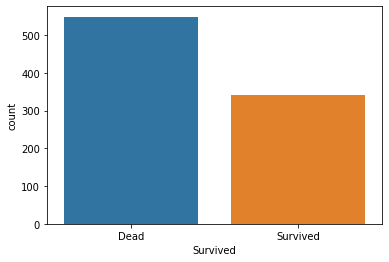

In [10]:
cat_summary(train, "Survived", plot=True)

In [11]:
from pycaret.classification import *

In [12]:
clf1 = setup(data = train, 
             target = 'Survived',
             numeric_imputation = 'mean',
             categorical_features = ['Sex','Embarked'], 
             ignore_features = ['Name','Ticket','Cabin'],
             silent = True,
             log_experiment = True, 
             experiment_name = 'titanic'
             )

,Description,Value
0,session_id,3487
1,Target,Survived
2,Target Type,Binary
3,Label Encoded,"Dead: 0, Survived: 1"
4,Original Data,"(891, 12)"
5,Missing Values,True
6,Numeric Features,3
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


In [13]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8233,0.8510,0.6931,0.8222,0.7431,0.6108,0.6241,0.0680
lr,Logistic Regression,0.8203,0.8444,0.7190,0.7853,0.7473,0.6086,0.6131,0.7740
lightgbm,Light Gradient Boosting Machine,0.8168,0.8509,0.6926,0.7945,0.7345,0.5966,0.6049,0.1570
rf,Random Forest Classifier,0.8153,0.8474,0.7018,0.7931,0.7363,0.5963,0.6071,0.1350
ridge,Ridge Classifier,0.8107,0.0000,0.7016,0.7735,0.7323,0.5869,0.5916,0.2410
lda,Linear Discriminant Analysis,0.8107,0.8455,0.7016,0.7737,0.7324,0.5870,0.5917,0.0250
ada,Ada Boost Classifier,0.8044,0.8294,0.7232,0.7477,0.7324,0.5786,0.5817,0.0650
et,Extra Trees Classifier,0.7913,0.8289,0.6801,0.7531,0.7060,0.5461,0.5558,0.1270
dt,Decision Tree Classifier,0.7848,0.7608,0.6839,0.7283,0.7015,0.5341,0.5382,0.2220
svm,SVM - Linear Kernel,0.6980,0.0000,0.5009,0.6426,0.5425,0.3262,0.3436,0.1820


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=3487, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [14]:
g_boost  = create_model('gbc') 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8413,0.8547,0.5833,1.0000,0.7368,0.6341,0.6814
1,0.8571,0.8315,0.6957,0.8889,0.7805,0.6769,0.6881
2,0.8254,0.8505,0.6957,0.8000,0.7442,0.6126,0.6161
3,0.8710,0.8896,0.7391,0.8947,0.8095,0.7133,0.7207
4,0.8065,0.7625,0.6087,0.8235,0.7000,0.5618,0.5758
5,0.8548,0.8829,0.6522,0.9375,0.7692,0.6683,0.6917
6,0.7581,0.8562,0.5652,0.7222,0.6341,0.4574,0.4651
7,0.8065,0.7670,0.6957,0.7619,0.7273,0.5778,0.5792
8,0.8226,0.9186,0.8696,0.7143,0.7843,0.6361,0.6450
9,0.7903,0.8963,0.8261,0.6786,0.7451,0.5699,0.5779


In [15]:
tuned_gb = tune_model(g_boost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8571,0.8494,0.6250,1.0000,0.7692,0.6736,0.7126
1,0.8254,0.7995,0.6522,0.8333,0.7317,0.6051,0.6151
2,0.8571,0.8614,0.6957,0.8889,0.7805,0.6769,0.6881
3,0.7903,0.8863,0.6087,0.7778,0.6829,0.5298,0.5386
4,0.7903,0.7536,0.5217,0.8571,0.6486,0.5115,0.5435
5,0.8871,0.9264,0.7391,0.9444,0.8293,0.7468,0.7593
6,0.7258,0.8356,0.5217,0.6667,0.5854,0.3851,0.3915
7,0.8065,0.8099,0.6957,0.7619,0.7273,0.5778,0.5792
8,0.8065,0.8907,0.8261,0.7037,0.7600,0.5996,0.6050
9,0.8548,0.9186,0.7826,0.8182,0.8000,0.6862,0.6866


In [16]:
rand_for=create_model('rf') 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8095,0.8499,0.5833,0.8750,0.7000,0.5685,0.5936
1,0.8571,0.8266,0.7391,0.8500,0.7907,0.6831,0.6869
2,0.8413,0.8603,0.7826,0.7826,0.7826,0.6576,0.6576
3,0.8387,0.8423,0.6957,0.8421,0.7619,0.6416,0.6483
4,0.8065,0.8021,0.6087,0.8235,0.7000,0.5618,0.5758
5,0.8387,0.8924,0.6522,0.8824,0.7500,0.6349,0.6507
6,0.7258,0.8066,0.5217,0.6667,0.5854,0.3851,0.3915
7,0.7903,0.7977,0.6957,0.7273,0.7111,0.5467,0.5470
8,0.7581,0.8651,0.9130,0.6176,0.7368,0.5279,0.5627
9,0.8871,0.9309,0.8261,0.8636,0.8444,0.7559,0.7564


In [17]:
log_reg=create_model('lr') 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8095,0.8451,0.6250,0.8333,0.7143,0.5758,0.5892
1,0.7937,0.7799,0.6522,0.7500,0.6977,0.5422,0.5453
2,0.8413,0.8391,0.7826,0.7826,0.7826,0.6576,0.6576
3,0.8387,0.8339,0.7826,0.7826,0.7826,0.6544,0.6544
4,0.8065,0.7391,0.6087,0.8235,0.7000,0.5618,0.5758
5,0.8871,0.9532,0.7391,0.9444,0.8293,0.7468,0.7593
6,0.8065,0.8099,0.7391,0.7391,0.7391,0.5853,0.5853
7,0.7903,0.8434,0.6957,0.7273,0.7111,0.5467,0.5470
8,0.8065,0.8952,0.7826,0.7200,0.7500,0.5926,0.5939
9,0.8226,0.9052,0.7826,0.7500,0.7660,0.6232,0.6236


In [18]:
best = compare_models(n_select = 15)
compare_model_results = pull()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8233,0.8510,0.6931,0.8222,0.7431,0.6108,0.6241,0.0640
lr,Logistic Regression,0.8203,0.8444,0.7190,0.7853,0.7473,0.6086,0.6131,0.0800
lightgbm,Light Gradient Boosting Machine,0.8168,0.8509,0.6926,0.7945,0.7345,0.5966,0.6049,0.0300
rf,Random Forest Classifier,0.8153,0.8474,0.7018,0.7931,0.7363,0.5963,0.6071,0.1900
ridge,Ridge Classifier,0.8107,0.0000,0.7016,0.7735,0.7323,0.5869,0.5916,0.0060
lda,Linear Discriminant Analysis,0.8107,0.8455,0.7016,0.7737,0.7324,0.5870,0.5917,0.0090
ada,Ada Boost Classifier,0.8044,0.8294,0.7232,0.7477,0.7324,0.5786,0.5817,0.0670
et,Extra Trees Classifier,0.7913,0.8289,0.6801,0.7531,0.7060,0.5461,0.5558,0.1690
dt,Decision Tree Classifier,0.7848,0.7608,0.6839,0.7283,0.7015,0.5341,0.5382,0.0080
svm,SVM - Linear Kernel,0.6980,0.0000,0.5009,0.6426,0.5425,0.3262,0.3436,0.0090


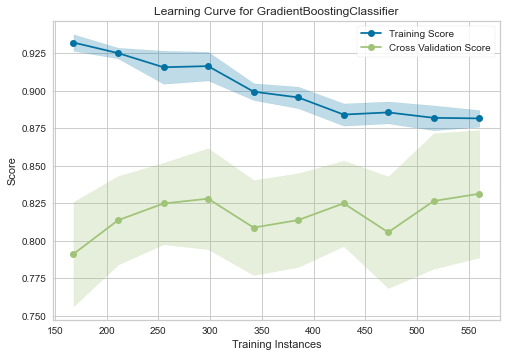

In [19]:
plot_model(estimator = tuned_gb, plot = 'learning')

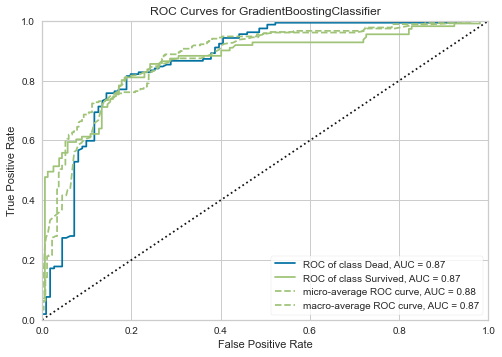

In [20]:
plot_model(estimator = tuned_gb, plot = 'auc')

In [21]:
evaluate_model(tuned_gb)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [22]:
predictions=predict_model(tuned_gb,train)
predictions

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Label,Score
0,1,Dead,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Dead,0.8972
1,2,Survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Survived,0.9724
2,3,Survived,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Survived,0.6045
3,4,Survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Survived,0.9631
4,5,Dead,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Dead,0.8959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,Dead,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Dead,0.8758
887,888,Survived,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Survived,0.9400
888,889,Dead,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Dead,0.7980
889,890,Survived,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Dead,0.6346


In [23]:
test_predictions=predict_model(tuned_gb,test)
test_predictions

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Label,Score
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Dead,0.9048
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Dead,0.8361
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Dead,0.9165
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Dead,0.8512
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Dead,0.7204
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Dead,0.8822
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Survived,0.9685
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Dead,0.9235
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Dead,0.8822


In [24]:
save_model(g_boost , 'deploy_gboost')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['Sex', 'Embarked'],
                                       display_types=False,
                                       features_todrop=['Name', 'Ticket',
                                                        'Cabin'],
                                       id_columns=['PassengerId'],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Survived',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_c...
                                             learning_rate=0.1, loss='deviance',
                                             max_depth=3, max_features=None,
                                             max_leaf_nodes=None,
                    

In [25]:
save_model(rand_for,'deploy_rand_for')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['Sex', 'Embarked'],
                                       display_types=False,
                                       features_todrop=['Name', 'Ticket',
                                                        'Cabin'],
                                       id_columns=['PassengerId'],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Survived',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_c...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='auto',
                

In [26]:
save_model(log_reg,'deploy_log_reg')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['Sex', 'Embarked'],
                                       display_types=False,
                                       features_todrop=['Name', 'Ticket',
                                                        'Cabin'],
                                       id_columns=['PassengerId'],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Survived',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_c...
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  LogisticRegression(C=1.0, class_weight=None,